# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [3]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

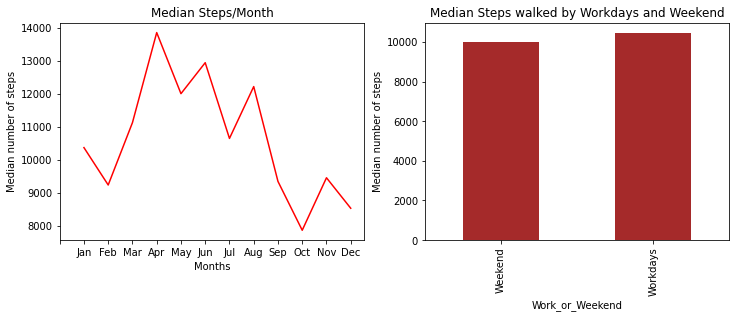

In [4]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
weekday_steps = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()

# We create the squema of the two plots 
f, ax = plt.subplots(1,2, figsize = (12,4))


plt.sca(ax[0])


weekday_steps.plot(kind = 'line', color = "red")

#Set graph labels
plt.ylabel('Median number of steps')
plt.xlabel('Months')
plt.title('Median Steps/Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])



# MEDIAN STEPS BY WORK_OR_WEEKEND

plt.sca(ax[1])

# Median calculation of work days and week days steps
weekday_steps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()


weekday_steps.plot(kind = 'bar', alpha = 1,  color = 'brown')

#Set graph labels
plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(range(2), ['Weekend','Workdays'])

# Save figure
plt.savefig('../figures/steps_work_weekend.jpg', dpi=1000)


In [5]:
weekday_steps

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

Fitbitter is slightly more active during workdays

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

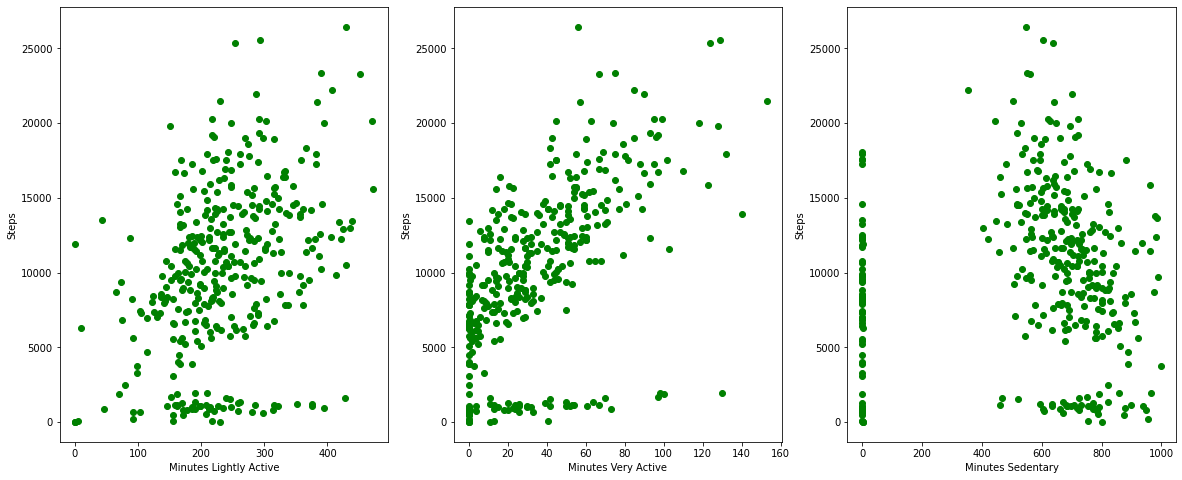

In [6]:
# Create a df with the columns we are interested in 
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
minutes_active = fitbit[cols]

# Create a figure of three plots
f, ax = plt.subplots(1, 3, figsize = (20,8))

for i in range(3):
    plt.sca(ax[i])
    plt.scatter(minutes_active[cols[i]], minutes_active[cols[3]], color = 'green')
    plt.xlabel(minutes_active[cols[i]].name)
    plt.ylabel('Steps')

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [8]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [9]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude=object).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [10]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=['int','float']).dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [12]:
plt.style.use('classic')   # matplotlib
# sns.set_style('whitegrid') # seaborn

# Figure size change
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

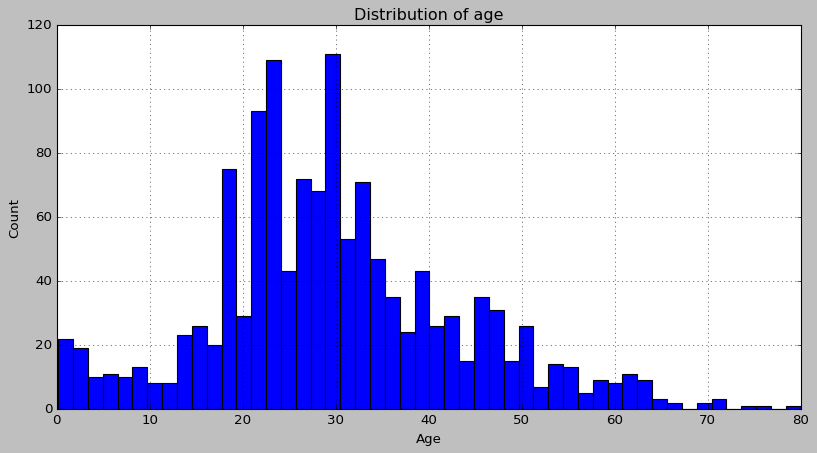

In [13]:
# Plot the histogram of column Age

titanic['Age'].hist(bins=50)

# Set titles, labels, etc
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

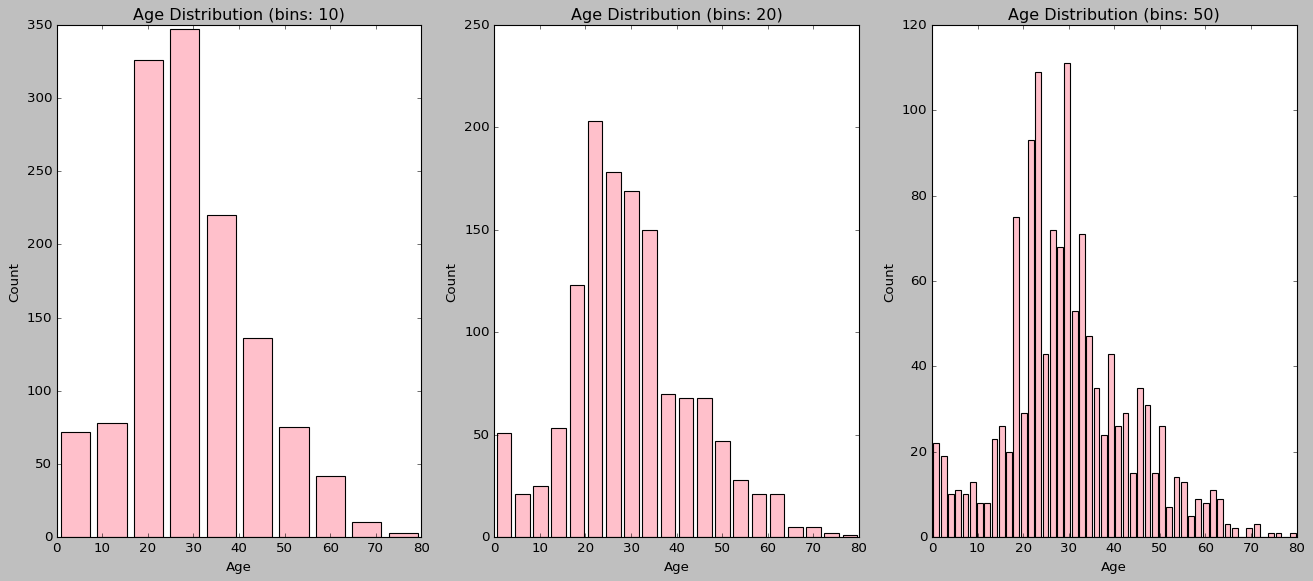

In [14]:
# Create a figure of three plots
f, ax = plt.subplots(1, 3, figsize = (20,8))

bins = [10, 20 , 50]

for i in range(3):
    plt.sca(ax[i])
    plt.hist(x=titanic.Age, bins = bins[i], rwidth=0.80, color = 'pink' )
    plt.title(f'Age Distribution (bins: {bins[i]})')
    plt.xlabel('Age')
    plt.ylabel('Count')


#### How does the bin size affect your plot?

In [15]:
"""
Using wider bins where the density of the underlying data points is low reduces noise due to sampling randomness; using narrower bins where the density is high (so the signal drowns the noise) gives greater precision to the density estimation. 

"""

'\nUsing wider bins where the density of the underlying data points is low reduces noise due to sampling randomness; using narrower bins where the density is high (so the signal drowns the noise) gives greater precision to the density estimation. \n\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

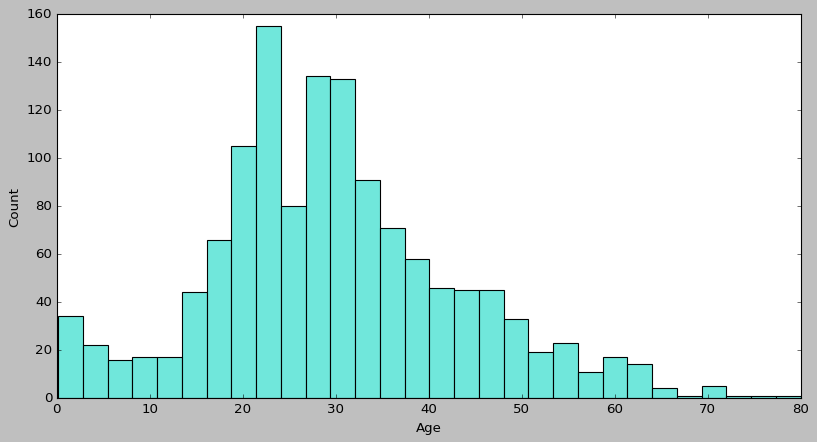

In [16]:
# Age histogram plot with Seaborn
sns.histplot(titanic['Age'], bins = 30, kde = False, color = '#40E0D0')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

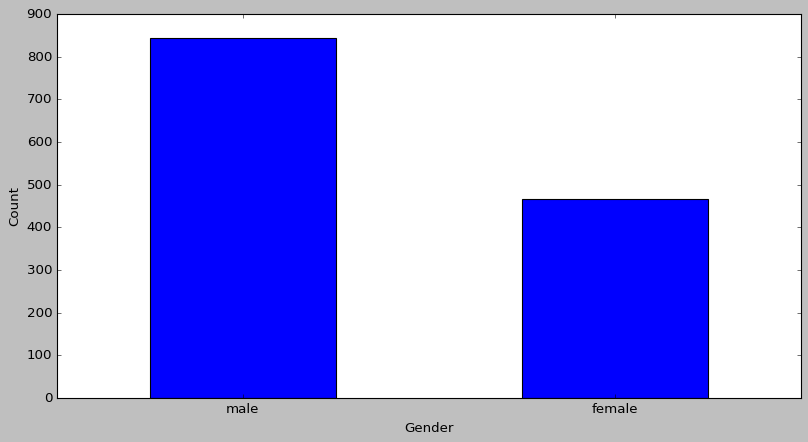

In [17]:
# Method 1 - matplotlib

titanic['Gender'].value_counts().plot(kind='bar')

# Add labels to the plot and change xticks rotation
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)

<AxesSubplot:xlabel='Gender', ylabel='count'>

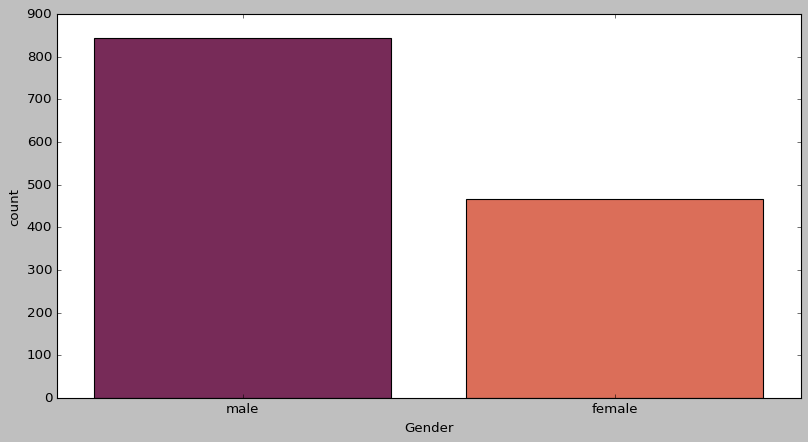

In [18]:
# Method 2 - seaborn
sns.countplot(x = titanic.Gender, palette = "rocket")

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Gender', ylabel='count'>

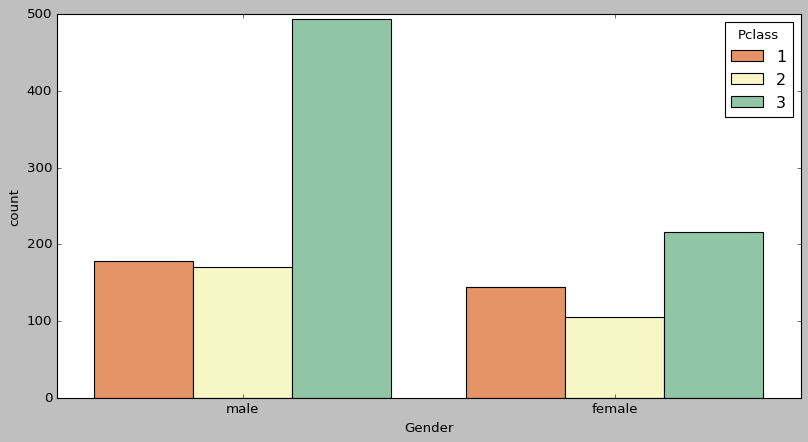

In [19]:
sns.countplot(data=titanic, x = "Gender", hue = "Pclass" , palette = "Spectral")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

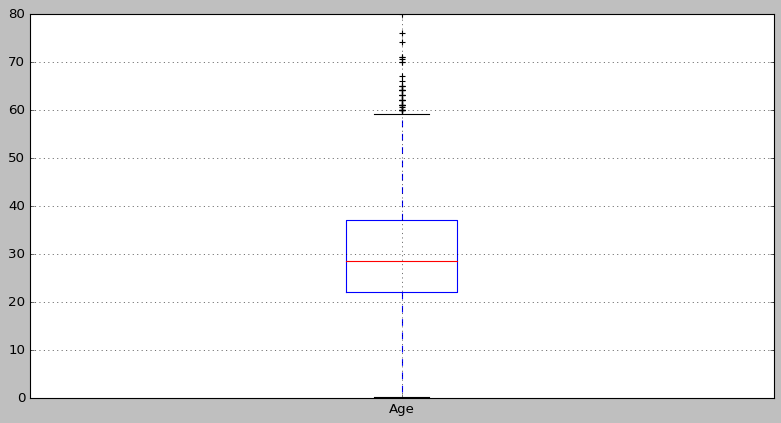

In [20]:
# Box plot
titanic.boxplot(column='Age')


#### What does the last plot tell you about the feature `Age`?

In [21]:
"""
From this type of plot (boxplot) you get the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers (black dashes).
"""

'\nFrom this type of plot (boxplot) you get the minimum, first quartile, median, \nthird quartile, and maximum.\n\nThe red line shows us the median of Age. \nThe blue box shows us the interquartile range (from Q1 to Q3).\nIt also shows us the outliers (black dashes).\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


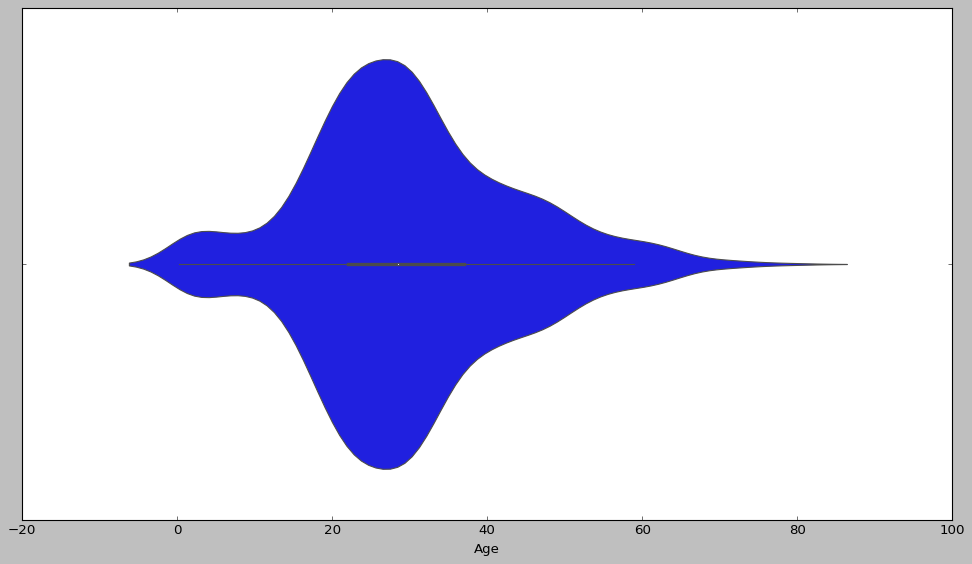

In [22]:
plt.figure(figsize = (15,8))

# Violin plot
sns.violinplot(titanic.Age);


#### What additional information does the last plot provide about feature `Age`?

In [23]:
"""
The violin plot shows both density and underlying distribution of the Age data (in blue).

This type of plots are considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:
- median (a white dot on the violin plot)
- interquartile range (the black bar in the center of violin)
- the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.

"""

'\nThe violin plot shows both density and underlying distribution of the Age data (in blue).\n\nThis type of plots are considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:\n- median (a white dot on the violin plot)\n- interquartile range (the black bar in the center of violin)\n- the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.\n\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Age')

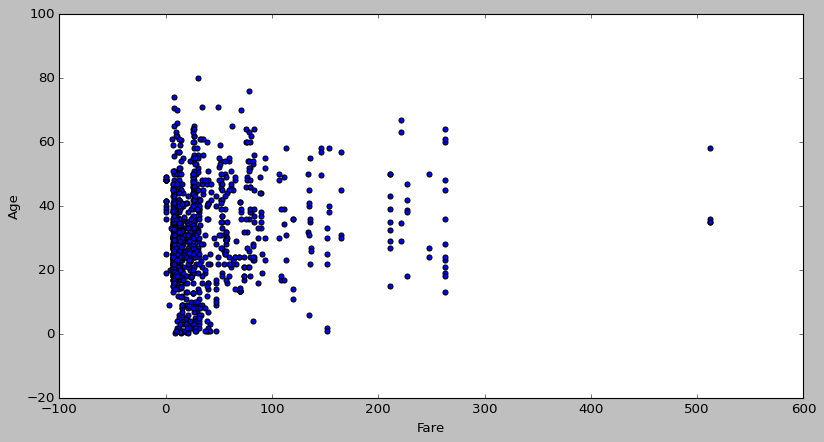

In [24]:
# Method 1 - matplotlib

# Scatter plot
plt.scatter(titanic['Fare'], titanic['Age'])

# labels
plt.xlabel('Fare')
plt.ylabel('Age')

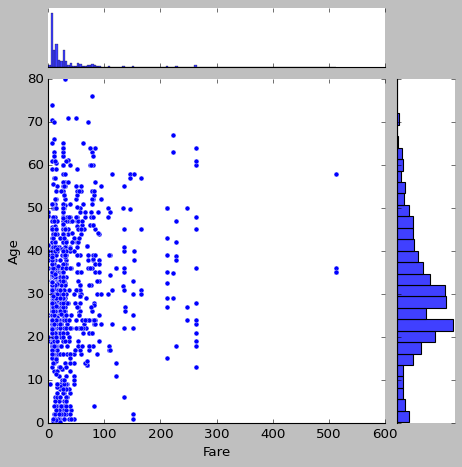

In [25]:
# Method 2 - seaborn

# Joinplot
sns.jointplot(x = 'Fare', y = 'Age', data = titanic)


#### Plot the correlation matrix using seaborn.

Text(0.5, 1.0, 'Correlation matrix')

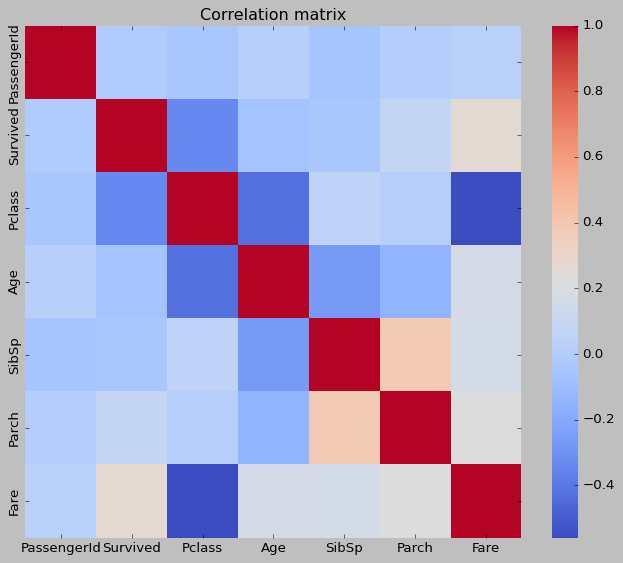

In [26]:
plt.figure(figsize = (10,8))

# Correlation matrix
sns.heatmap(titanic.corr(), cmap='coolwarm')

# Title
plt.title('Correlation matrix')


#### What are the most correlated features?

In [27]:
"""
The most correlated features are Parch and SibSp.
"""

'\nThe most correlated features are Parch and SibSp.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

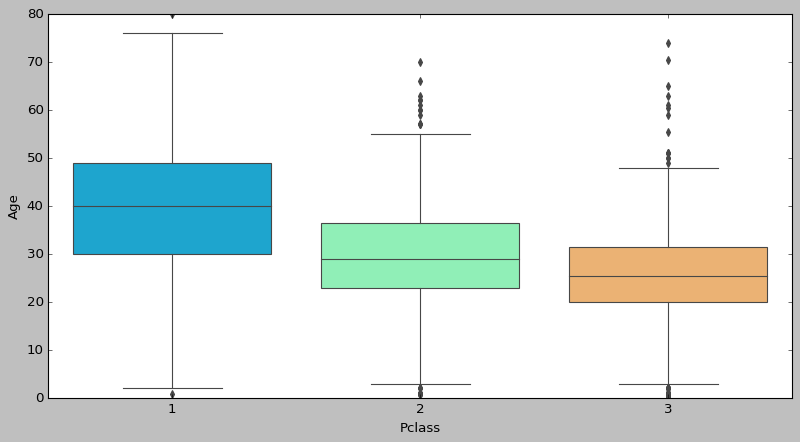

In [28]:
# Boxplot
sns.boxplot(x = 'Pclass',y = 'Age',data = titanic, palette = 'rainbow')


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

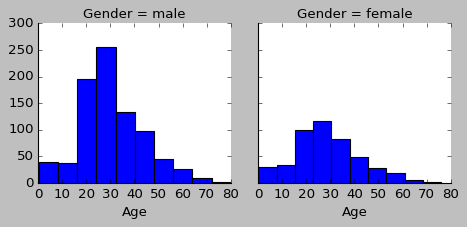

In [29]:
gender_facetgrid = sns.FacetGrid(data = titanic, col = 'Gender')

gender_facetgrid .map(plt.hist, 'Age')
